In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



Data types and basic info after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1126 entries, 0 to 1125
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Symbol          1126 non-null   object        
 1   Date            1126 non-null   datetime64[ns]
 2   Open            1126 non-null   float64       
 3   High            1126 non-null   float64       
 4   Low             1126 non-null   float64       
 5   Close           1126 non-null   float64       
 6   Percent Change  1125 non-null   float64       
 7   Volume          1126 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 70.5+ KB
None

Statistical Summary:
                                Date         Open         High          Low  \
count                           1126  1126.000000  1126.000000  1126.000000   
mean   2022-05-26 06:45:23.978685696   457.671758   470.570515   446.19360

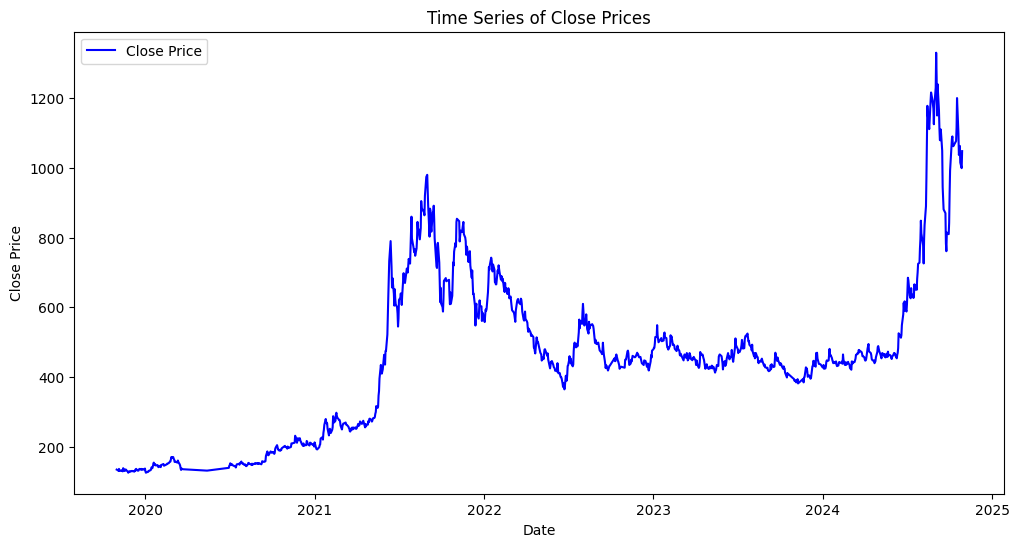

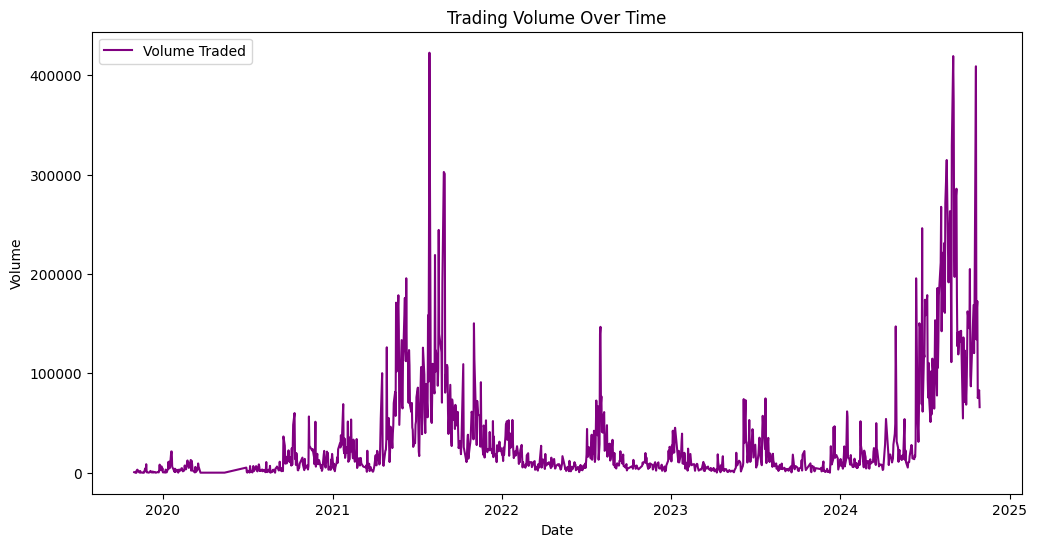

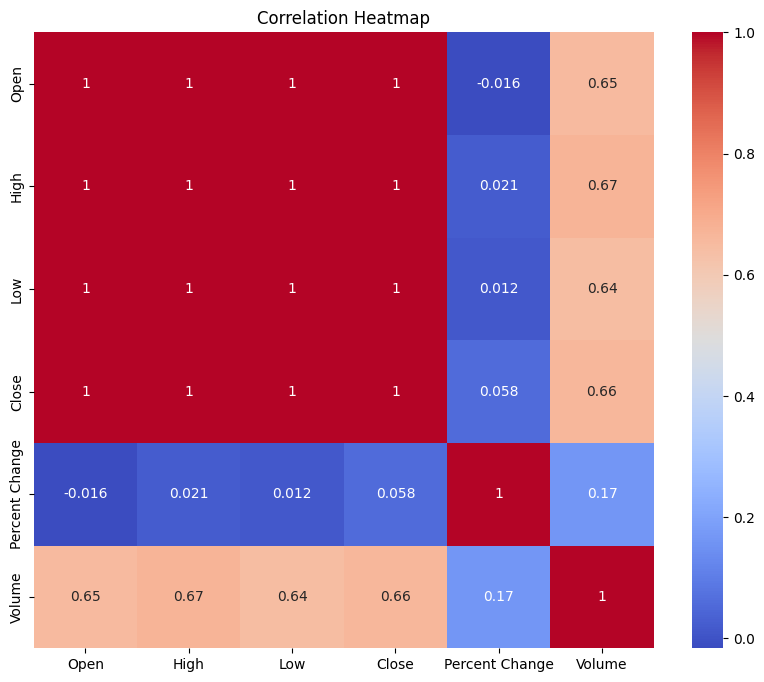


Data after feature engineering:
  Symbol       Date      Open      High       Low     Close  Percent Change  \
0   GFCL 2024-10-28  2.478069  2.447916  2.561794  2.611197        1.443733   
1   GFCL 2024-10-27  2.474088  2.387822  2.548427  2.395165       -0.546364   
2   GFCL 2024-10-24  2.676640  2.574030  2.598667  2.465552       -1.453477   
3   GFCL 2024-10-23  2.597477  2.655284  2.736942  2.677600        0.462569   
4   GFCL 2024-10-22  2.531139  2.600268  2.649368  2.598802        0.178710   

     Volume  Year  Month  Day  
0  0.633490  2024     10   28  
1  0.953380  2024     10   27  
2  0.805530  2024     10   24  
3  2.637192  2024     10   23  
4  2.482168  2024     10   22  


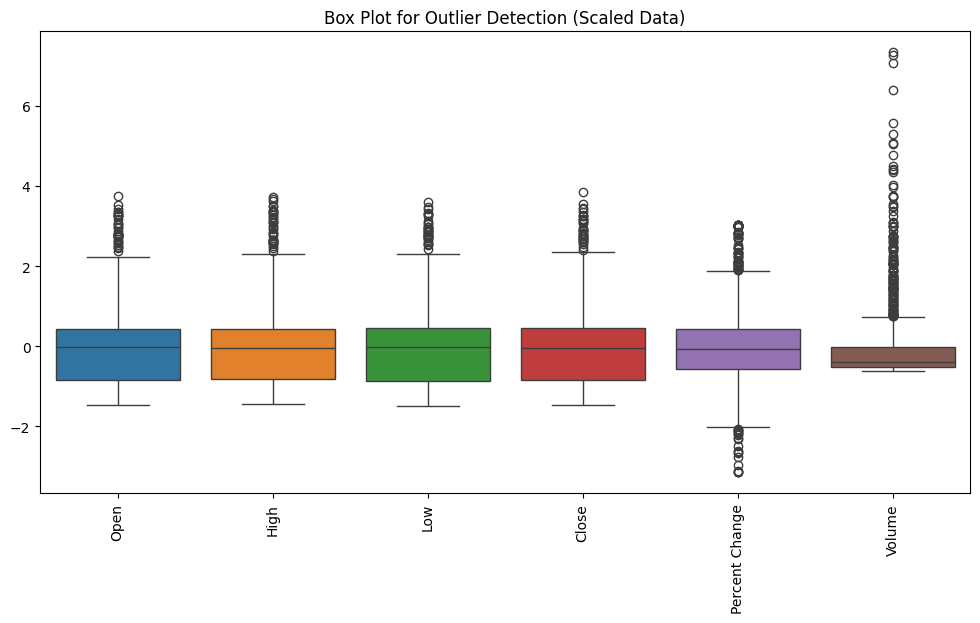

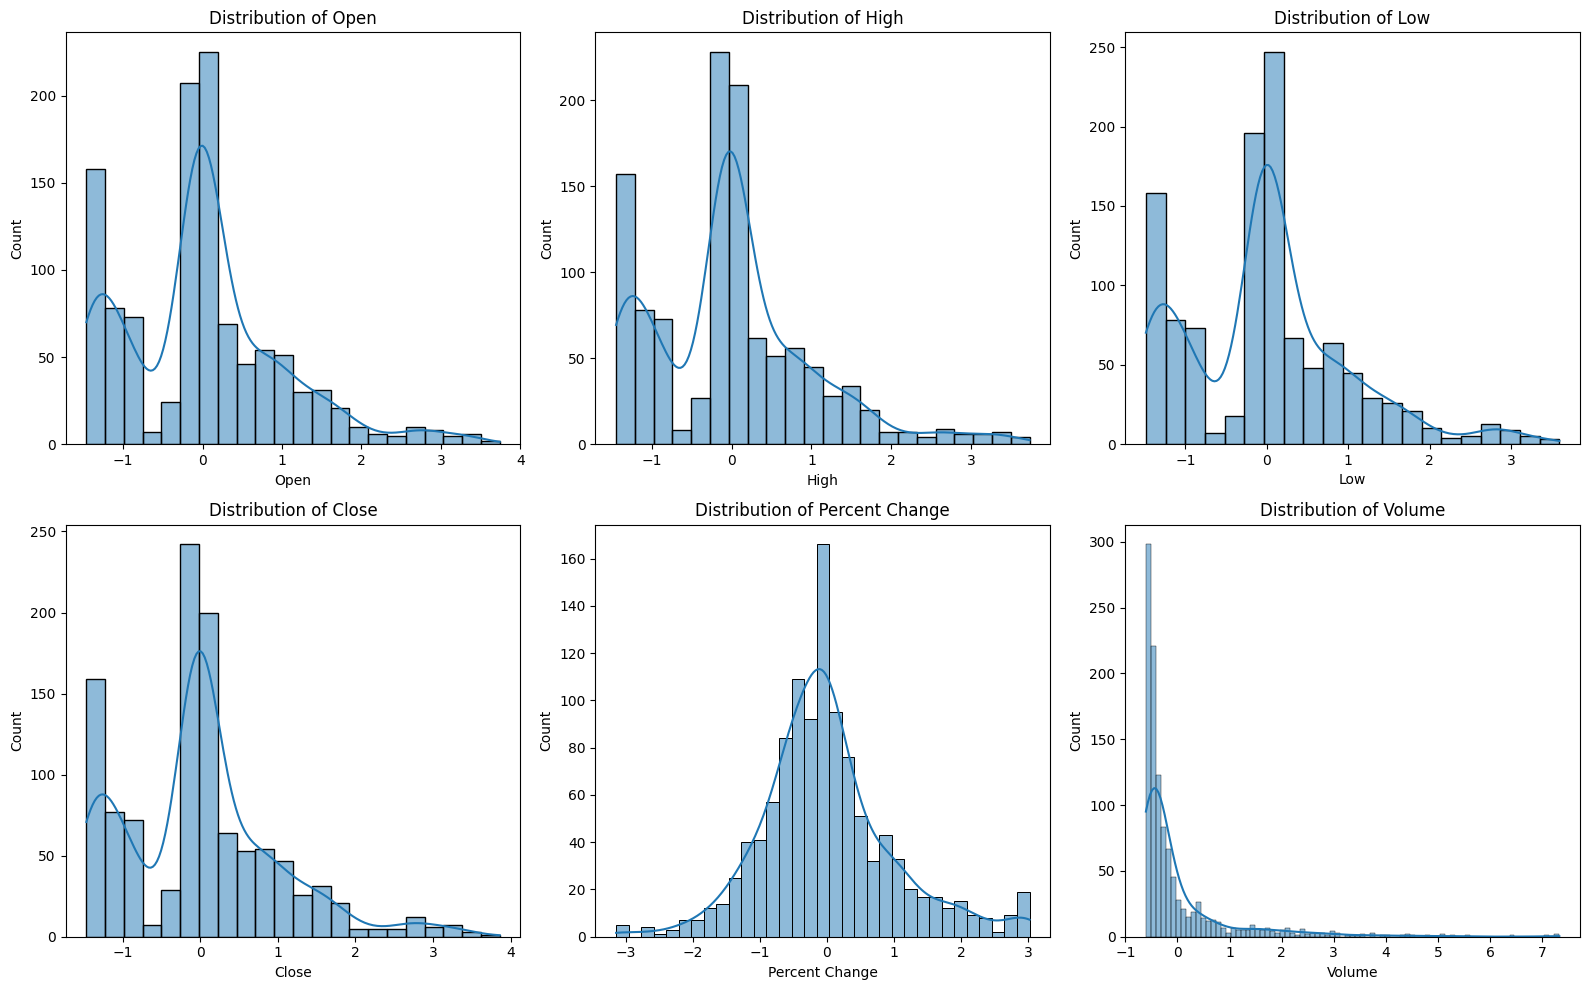

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the Dataset
file_path = '/content/drive/MyDrive/Neural Network - Subodh sir/Week 2/GFCL.csv'
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Remove '%' from 'Percent Change' and convert to float, handling errors by setting invalid entries to NaN
df['Percent Change'] = pd.to_numeric(df['Percent Change'].str.replace('%', ''), errors='coerce')

# Remove commas from 'Volume' and convert to float, handling errors as NaN where necessary
df['Volume'] = pd.to_numeric(df['Volume'].str.replace(',', ''), errors='coerce')

# Confirm data conversion success
print("\nData types and basic info after cleaning:")
print(df.info())

# 1. Exploratory Data Analysis (EDA)

# Summary statistics
print("\nStatistical Summary:")
print(df.describe())

# Plot time series for 'Close' prices
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], color='blue', label='Close Price')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Time Series of Close Prices")
plt.legend()
plt.show()

# Visualizing the 'Volume' traded over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'], color='purple', label='Volume Traded')
plt.xlabel("Date")
plt.ylabel("Volume")
plt.title("Trading Volume Over Time")
plt.legend()
plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Percent Change', 'Volume']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


# 2. Visualization

# Box plot to check for any remaining outliers in scaled numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[scaled_features])
plt.title("Box Plot for Outlier Detection (Scaled Data)")
plt.xticks(rotation=90)
plt.show()

# Histogram plots for each numerical feature
plt.figure(figsize=(16, 10))
for i, feature in enumerate(scaled_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Save the processed dataset (if needed for neural network modeling)
df.to_csv('processed_GFCL_dataset.csv', index=False)

